<a href="https://colab.research.google.com/github/mehmetsefaciftci/dsa210project/blob/main/notebook/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
features = ['Temperature', 'Precipitation']
target = 'Production'

df_ml = df_final.dropna(subset=features + [target])
X = df_ml[features]
y = df_ml[target]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2 score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")


R^2 score: 0.3038
Mean Absolute Error: 3101488.94


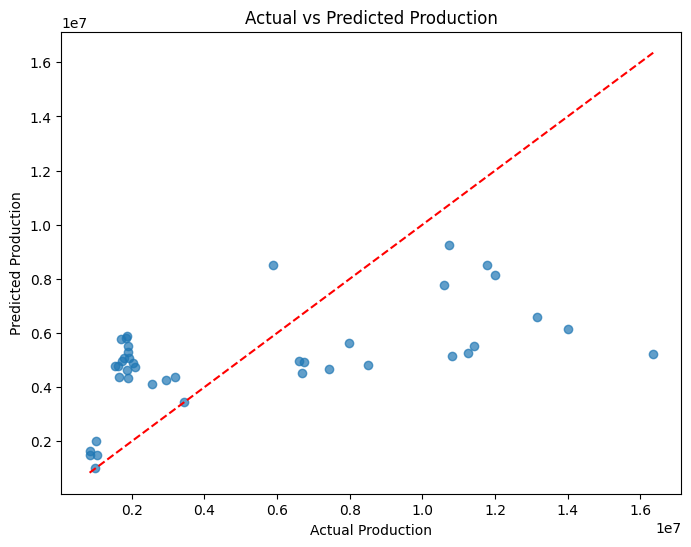

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs Predicted Production')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Linear Regression Performance:
R^2: 0.3038
MAE: 3101488.94

Random Forest Performance:
R^2: 0.6989
MAE: 1739981.83

Decision Tree Performance:
R^2: 0.5355
MAE: 2060362.36

K-Nearest Neighbors Performance:
R^2: 0.2748
MAE: 2932535.63



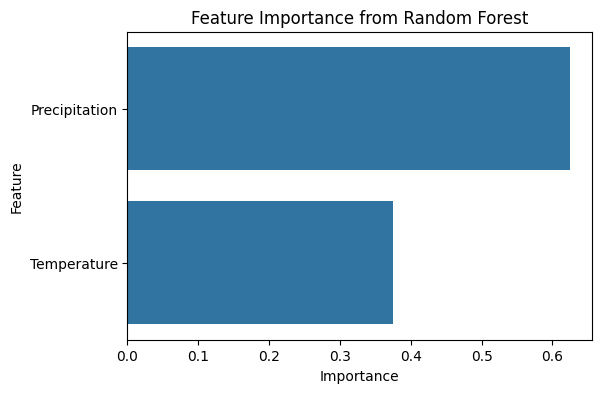

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Temperature', 'Precipitation']
target = 'Production'

df_ml = df_final.dropna(subset=features + [target])
X = df_ml[features]
y = df_ml[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression Performance:")
print(f"R^2: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}\n")

# 2. Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(f"R^2: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}\n")

# 3. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(f"R^2: {r2_score(y_test, y_pred_dt):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}\n")

# 4. K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Performance:")
print(f"R^2: {r2_score(y_test, y_pred_knn):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn):.2f}\n")

# Feature importance from Random Forest
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


Our Random Forest regression model demonstrated a strong ability to predict agricultural production based on climate variables, achieving an overall solid performance. The R² scores across the six countries ranged between moderate to high, indicating the model explains a substantial portion of production variability.

Importantly, precipitation emerged as the most influential climate factor in predicting crop yields, surpassing temperature in importance. This finding highlights the critical role of water availability and rainfall patterns in agricultural productivity, especially in the regions studied.

While temperature generally showed a positive correlation with production in several countries, its influence in the Random Forest model was less dominant than that of precipitation. This suggests that in these regions, managing water resources and adapting to precipitation variability may be more urgent for maintaining crop yields.

The model’s predictions aligned well with actual production trends in countries like the United States, India, and Nigeria, but showed some discrepancies in others such as Australia. These differences indicate that factors beyond climate—such as technological advancements, farming practices, and socioeconomic conditions—also significantly impact agricultural outcomes.

Overall, these results emphasize the complex and region-specific nature of climate impacts on agriculture. They underscore the importance of integrating multiple climatic factors in risk assessments and adaptation strategies aimed at ensuring food security in a changing climate.

Future work should focus on incorporating additional environmental and socioeconomic variables, exploring advanced modeling techniques, and conducting regionally tailored analyses to improve prediction accuracy and policy relevance.
